# ebird geocoding project

My ultimate goal is to make a visualization of the checklist locations in a person's ebird data.  Right now, I'm using this notebook to play with manipulating the data using pandas, then I will move into the geocoding and visualization parts.

In [1]:
import pandas as pd
import plotly.express as px

Import the ebird data and view some basic info to check it

In [2]:
df = pd.read_csv('MyEBirdData_2023-09-06.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Submission ID           3310 non-null   object 
 1   Common Name             3310 non-null   object 
 2   Scientific Name         3310 non-null   object 
 3   Taxonomic Order         3310 non-null   int64  
 4   Count                   3310 non-null   object 
 5   State/Province          3310 non-null   object 
 6   County                  3310 non-null   object 
 7   Location ID             3310 non-null   object 
 8   Location                3310 non-null   object 
 9   Latitude                3310 non-null   float64
 10  Longitude               3310 non-null   float64
 11  Date                    3310 non-null   object 
 12  Time                    3310 non-null   object 
 13  Protocol                3310 non-null   object 
 14  Duration (Min)          3262 non-null   

The only columns I care about right now are: Submission ID (a uniq id for a checklist), state/province, county, location id, location, lat, long, date.  So if I drop all other columns, and then dedup on submission ID, I should have a list of each location and when I visited it. (I think?)

In [4]:
df_locations = df.iloc[:, [0,5,6,7,8,9,10,11]].drop_duplicates(subset='Submission ID')
print(df_locations.head())

  Submission ID State/Province   County Location ID  \
0     S92964074          US-TX  Aransas    L1096078   
1     S99552108          US-TX  Aransas    L1096078   
2     S99599243          US-TX  Aransas     L896338   
3     S92918390          US-TX  Aransas     L662369   
4     S69502261          US-TX  Bastrop   L11524553   

                                            Location   Latitude  Longitude  \
0      Goose Island SP--Big Tree/Lamar Beach rd area  28.149768 -96.976254   
1      Goose Island SP--Big Tree/Lamar Beach rd area  28.149768 -96.976254   
2                                 Holiday Beach Pond  28.162241 -96.996725   
3                               Rockport- Little Bay  28.035925 -97.042043   
4  199 Wilbarger Bend Rd, Bastrop US-TX 30.16797,...  30.167966 -97.418399   

         Date  
0  2021-08-08  
1  2021-12-27  
2  2021-12-28  
3  2021-08-07  
4  2020-05-23  


View the most visited locations, just for fun.

In [5]:
df_locations.Location.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Location
Commons Ford Ranch Metro Park                          11
Dittmar Park                                           10
Southeast Greenway, Mueller                             7
Nicholas Dawson Park                                    5
Zilker Metro Park--Barton Springs area                  5
                                                       ..
Rio Grande Valley SP--Tingley Beach bosque ponds        1
Hillside Gardens (Edinburgh)                            1
Green Park                                              1
Dunkeld area                                            1
629 Caroline St, Key West US-FL 24.55982, -81.80228     1
Name: count, Length: 211, dtype: int64

Add new column for Year

In [6]:
df_locations['Year'] = df_locations['Date'].apply(lambda x : x[:4])
print(df_locations.sort_values('Location ID').head())

    Submission ID State/Province   County Location ID  \
154     S99579999          US-TX  Calhoun    L1021344   
30     S141933869         GB-ENG   London   L10466555   
23     S135633155          US-TX   Travis    L1079595   
22     S113490984          US-TX   Travis    L1079595   
44      S92555566          US-NY   Monroe     L109138   

                                      Location   Latitude  Longitude  \
154  Aransas NWR--Wildlife Tower (Calhoun Co.)  28.250401 -96.789433   
30                   Hyde Park--The Serpentine  51.505163  -0.164537   
23                          Bauerle Ranch Park  30.161974 -97.843380   
22                          Bauerle Ranch Park  30.161974 -97.843380   
44               Braddock Bay Park--Hawk Watch  43.303650 -77.716303   

           Date  Year  
154  2021-12-28  2021  
30   2023-06-18  2023  
23   2023-04-30  2023  
22   2022-06-21  2022  
44   2021-07-31  2021  


Create two new dataframes: one with number of checklists per location per year, and one with the data about each location. Then we'll combine those two to get the final dataframe.

*There is almost certainly a more efficient way to do this with pandas, but I can't figure it out.*

In [7]:
df_loc_count = df_locations.groupby(["Location ID","Year"], as_index=False)["Submission ID"].count()
print(df_loc_count.sort_values('Location ID').head(10))
print(df_loc_count.shape)

  Location ID  Year  Submission ID
0    L1021344  2021              1
1   L10466555  2023              1
2    L1079595  2022              1
3    L1079595  2023              1
4     L109138  2021              1
5     L109143  2021              1
6    L1096078  2021              2
7   L11136195  2020              1
8    L1119372  2019              1
9    L1119372  2022              1
(251, 3)


In [9]:
df_loc_data = df_locations.iloc[:, [3,4,1,2,5,6]].drop_duplicates(subset='Location ID')
print(df_loc_data.sort_values('Location ID').head(10))
print(df_loc_data.shape)

     Location ID                                           Location  \
154     L1021344          Aransas NWR--Wildlife Tower (Calhoun Co.)   
30     L10466555                          Hyde Park--The Serpentine   
22      L1079595                                 Bauerle Ranch Park   
44       L109138                      Braddock Bay Park--Hawk Watch   
2556     L109143                                    Hamlin Beach SP   
0       L1096078      Goose Island SP--Big Tree/Lamar Beach rd area   
447    L11136195  2480–2572 Post Oak Rd, Webberville US-TX 30.21...   
57      L1119372                   Webberville Park (Big)(HOTE 035)   
406    L11199102  Toney Burger Activity Center, Sunset Valley US...   
309     L1124333                                        Post Oak Rd   

     State/Province   County   Latitude  Longitude  
154           US-TX  Calhoun  28.250401 -96.789433  
30           GB-ENG   London  51.505163  -0.164537  
22            US-TX   Travis  30.161974 -97.843380  
44    

In [10]:
# Merge df_loc_count (count of checklists per location) with df_loc_data (geo data about each location)
df_merge2 = pd.merge(df_loc_count, df_loc_data, how="left", on="Location ID")
df_merge2 = df_merge2.rename(columns={'Submission ID': 'Visits'}).sort_values(['Year','Location ID'])
print(df_merge2.head(10))
print(df_merge2.shape)

   Location ID  Year  Visits                               Location  \
8     L1119372  2019       1       Webberville Park (Big)(HOTE 035)   
11    L1124333  2019       2                            Post Oak Rd   
24     L122362  2019       1  Village Creek Drying Beds (PPW-W 083)   
27     L127422  2019       1                           Crandon Park   
31     L128957  2019       1                   Emma Long Metro Park   
39     L130766  2019       1                Hornsby Bend (HOTE 037)   
44    L1316670  2019       1              Webberville Park (Little)   
55     L143084  2019       1                 Wakodahatchee Wetlands   
83     L196306  2019       1            Rio Grande Nature Center SP   
86    L2023174  2019       1             Mills Pond at Wells Branch   

   State/Province      County   Latitude   Longitude  
8           US-TX      Travis  30.211460  -97.495766  
11          US-TX      Travis  30.219340  -97.503010  
24          US-TX     Tarrant  32.784279  -97.126618 

In [11]:
fig = px.scatter_geo(df_merge2, lat='Latitude', lon='Longitude', title='ebird checklists', size='Visits', hover_name='Location', color='Visits', scope='usa', 
                     animation_frame='Year', 
                     height=600)

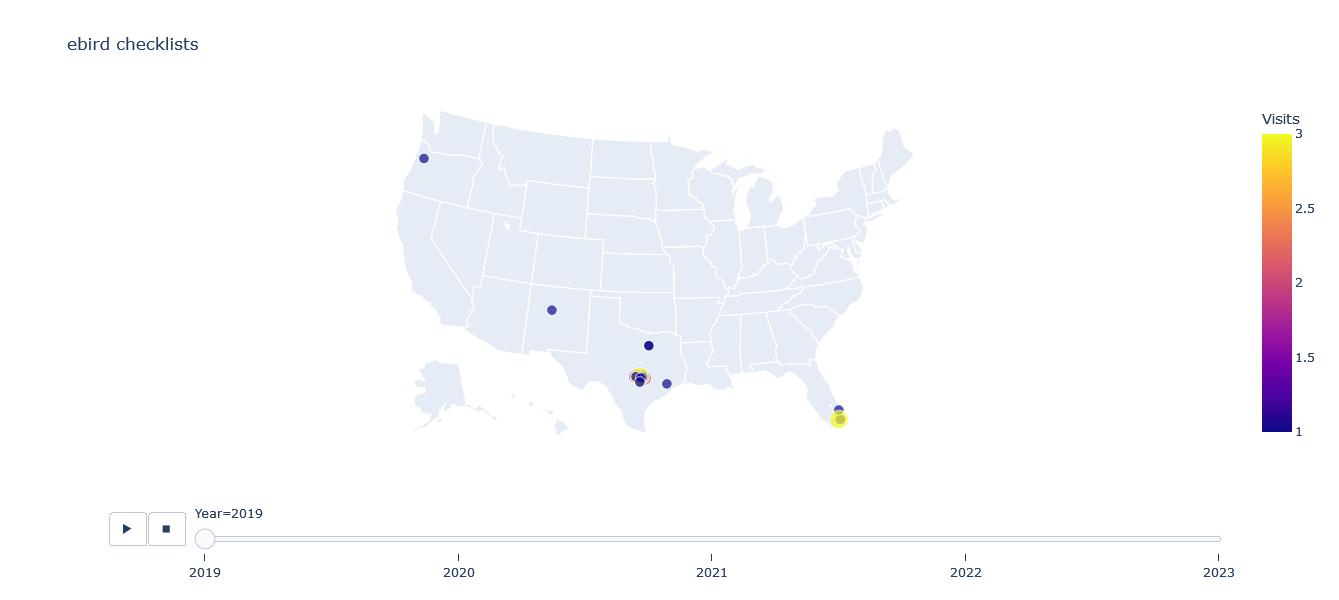

In [13]:
fig.show()